# Analysis

### Load Data

In [1]:
# packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as cplt

# Plot Set Up
# colors
c1 = '#6DB1BF' # cyan
c2 = '#315659' # blue
c3 = '#F98948' # orange
c4 = '#C0DA74' # green
c5 = '#859750' # dark green
# sizes
w,h = 6,4
dpi=200

# load csv
data = pd.read_csv('Data/Clean.csv',index_col='URLs')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38258 entries, http://mashable.com/2013/01/07/cosmic-events-doomsday/ to http://mashable.com/2014/12/26/wacky-kickstarter-projects-2014/
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shares              38258 non-null  int64  
 1   title_neg_polarity  38258 non-null  float64
 2   title_neu_polarity  38258 non-null  float64
 3   title_pos_polarity  38258 non-null  float64
 4   title_avg_polarity  38258 non-null  float64
 5   title_subjectivity  38258 non-null  float64
 6   n_tokens_title      38258 non-null  int64  
 7   text_neg_polarity   38258 non-null  float64
 8   text_neu_polarity   38258 non-null  float64
 9   text_pos_polarity   38258 non-null  float64
 10  text_avg_polarity   38258 non-null  float64
 11  text_subjectivity   38258 non-null  float64
 12  n_tokens_text       38258 non-null  int64  
 13  n_refs              38258 non-null  int64  
 

Overall there are a total of 38257 collected entries with 33 columns. `Clean.csv` contains 97% percent of the original entries from `OnlineNewsPopularity.csv` and currently half of the original features. 

### Summary Statistics

In [2]:
data.describe().T.drop(columns='count').round(3)

,mean,std,min,25%,50%,75%,max
shares,3403.978,11757.512,1.000,946.000,1400.000,2800.000,843300.000
title_neg_polarity,0.075,0.138,0.000,0.000,0.000,0.143,0.787
title_neu_polarity,0.826,0.187,0.101,0.690,0.833,1.000,1.000
title_pos_polarity,0.099,0.151,0.000,0.000,0.000,0.217,0.899
title_avg_polarity,0.034,0.339,-0.939,0.000,0.000,0.226,0.926
title_subjectivity,0.273,0.325,0.000,0.000,0.100,0.500,1.000
n_tokens_title,9.013,2.010,1.000,8.000,9.000,10.000,20.000
text_neg_polarity,0.046,0.040,0.000,0.017,0.036,0.066,0.423
text_neu_polarity,0.851,0.057,0.342,0.817,0.856,0.892,1.000
text_pos_polarity,0.103,0.049,0.000,0.068,0.097,0.131,0.433


Looking at the summary statistics it seems that Mashable articles tend to lean to the more positive and subjective side. Still there appears to be a very wide range of value and the articles seemed to be quite varied based on the standard deviations.

### Distribution of the Shares
Since the `shares` column is the target variable, lets take a greater look at its distribution

Mean Shares:   3403
Median Shares: 1400


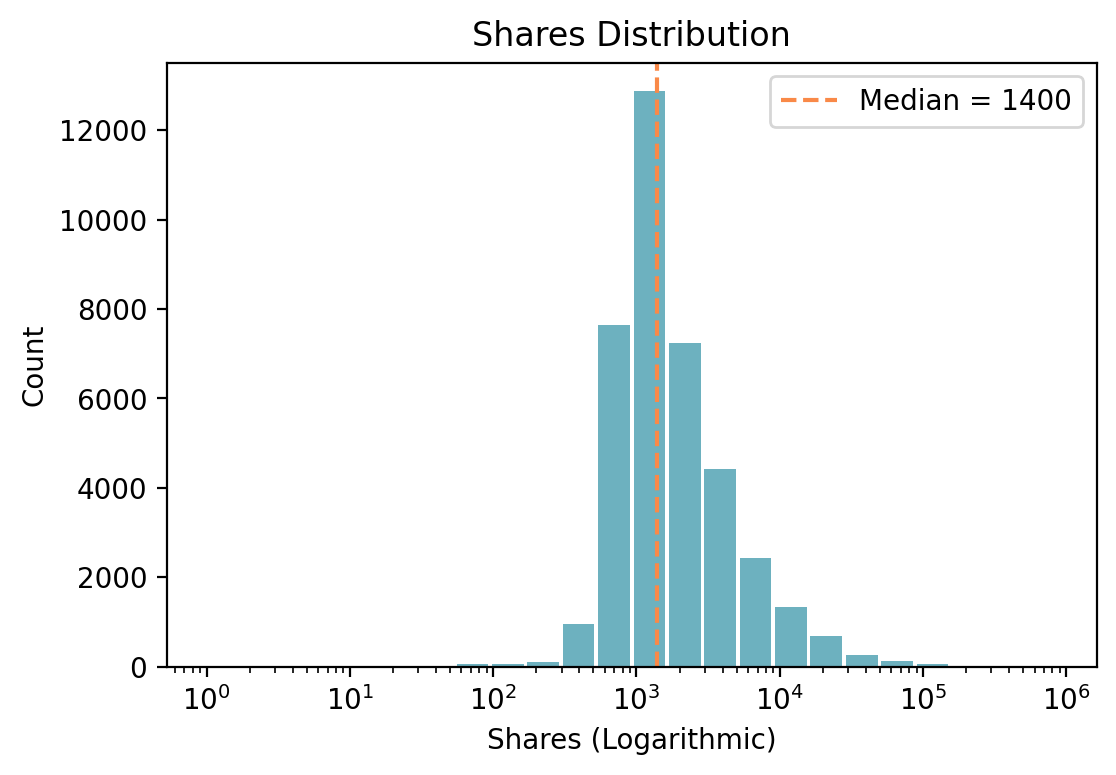

In [3]:
plt.figure(figsize=(w,h),dpi=dpi)

logbins = np.geomspace(data.shares.min(), data.shares.max(), 25)

plt.hist(data.shares,color=c1,bins=logbins,rwidth=0.9,label=None)
plt.axvline(data.shares.median(),c=c3,linestyle='--',label='Median = 1400')
plt.xscale('log')
plt.legend()
plt.xlabel("Shares (Logarithmic)")
plt.ylabel('Count')
plt.title('Shares Distribution');

print('Mean Shares:   %d' % data.shares.mean())
print('Median Shares: %d' % data.shares.median())

The shares have an incredibly long, right-tailed distribution; the only way to properly see it is to display it on a logarithmic axis. Already we can see that the shares of well performing articles can grow so high compared to where the majority of articles lay, the mean and the median are quite far apart from each other. For the rest of this analysis I will rely on the median rather than the mean to understand the ‘typical’ article.

### Feature Distributions

So let’s check out the distributions of the other columns. Since it seems that outliers are quite prevalent, I’ll limit the range of these distributions to only include entries within the mean plus or minus four times the std (I’m not sure if this is a normal way of limiting things, but this is how we typically mark outliers in physics).

Example: m = mean, s = standard deviation

New range = \[m - 4s, m + 4s\]

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

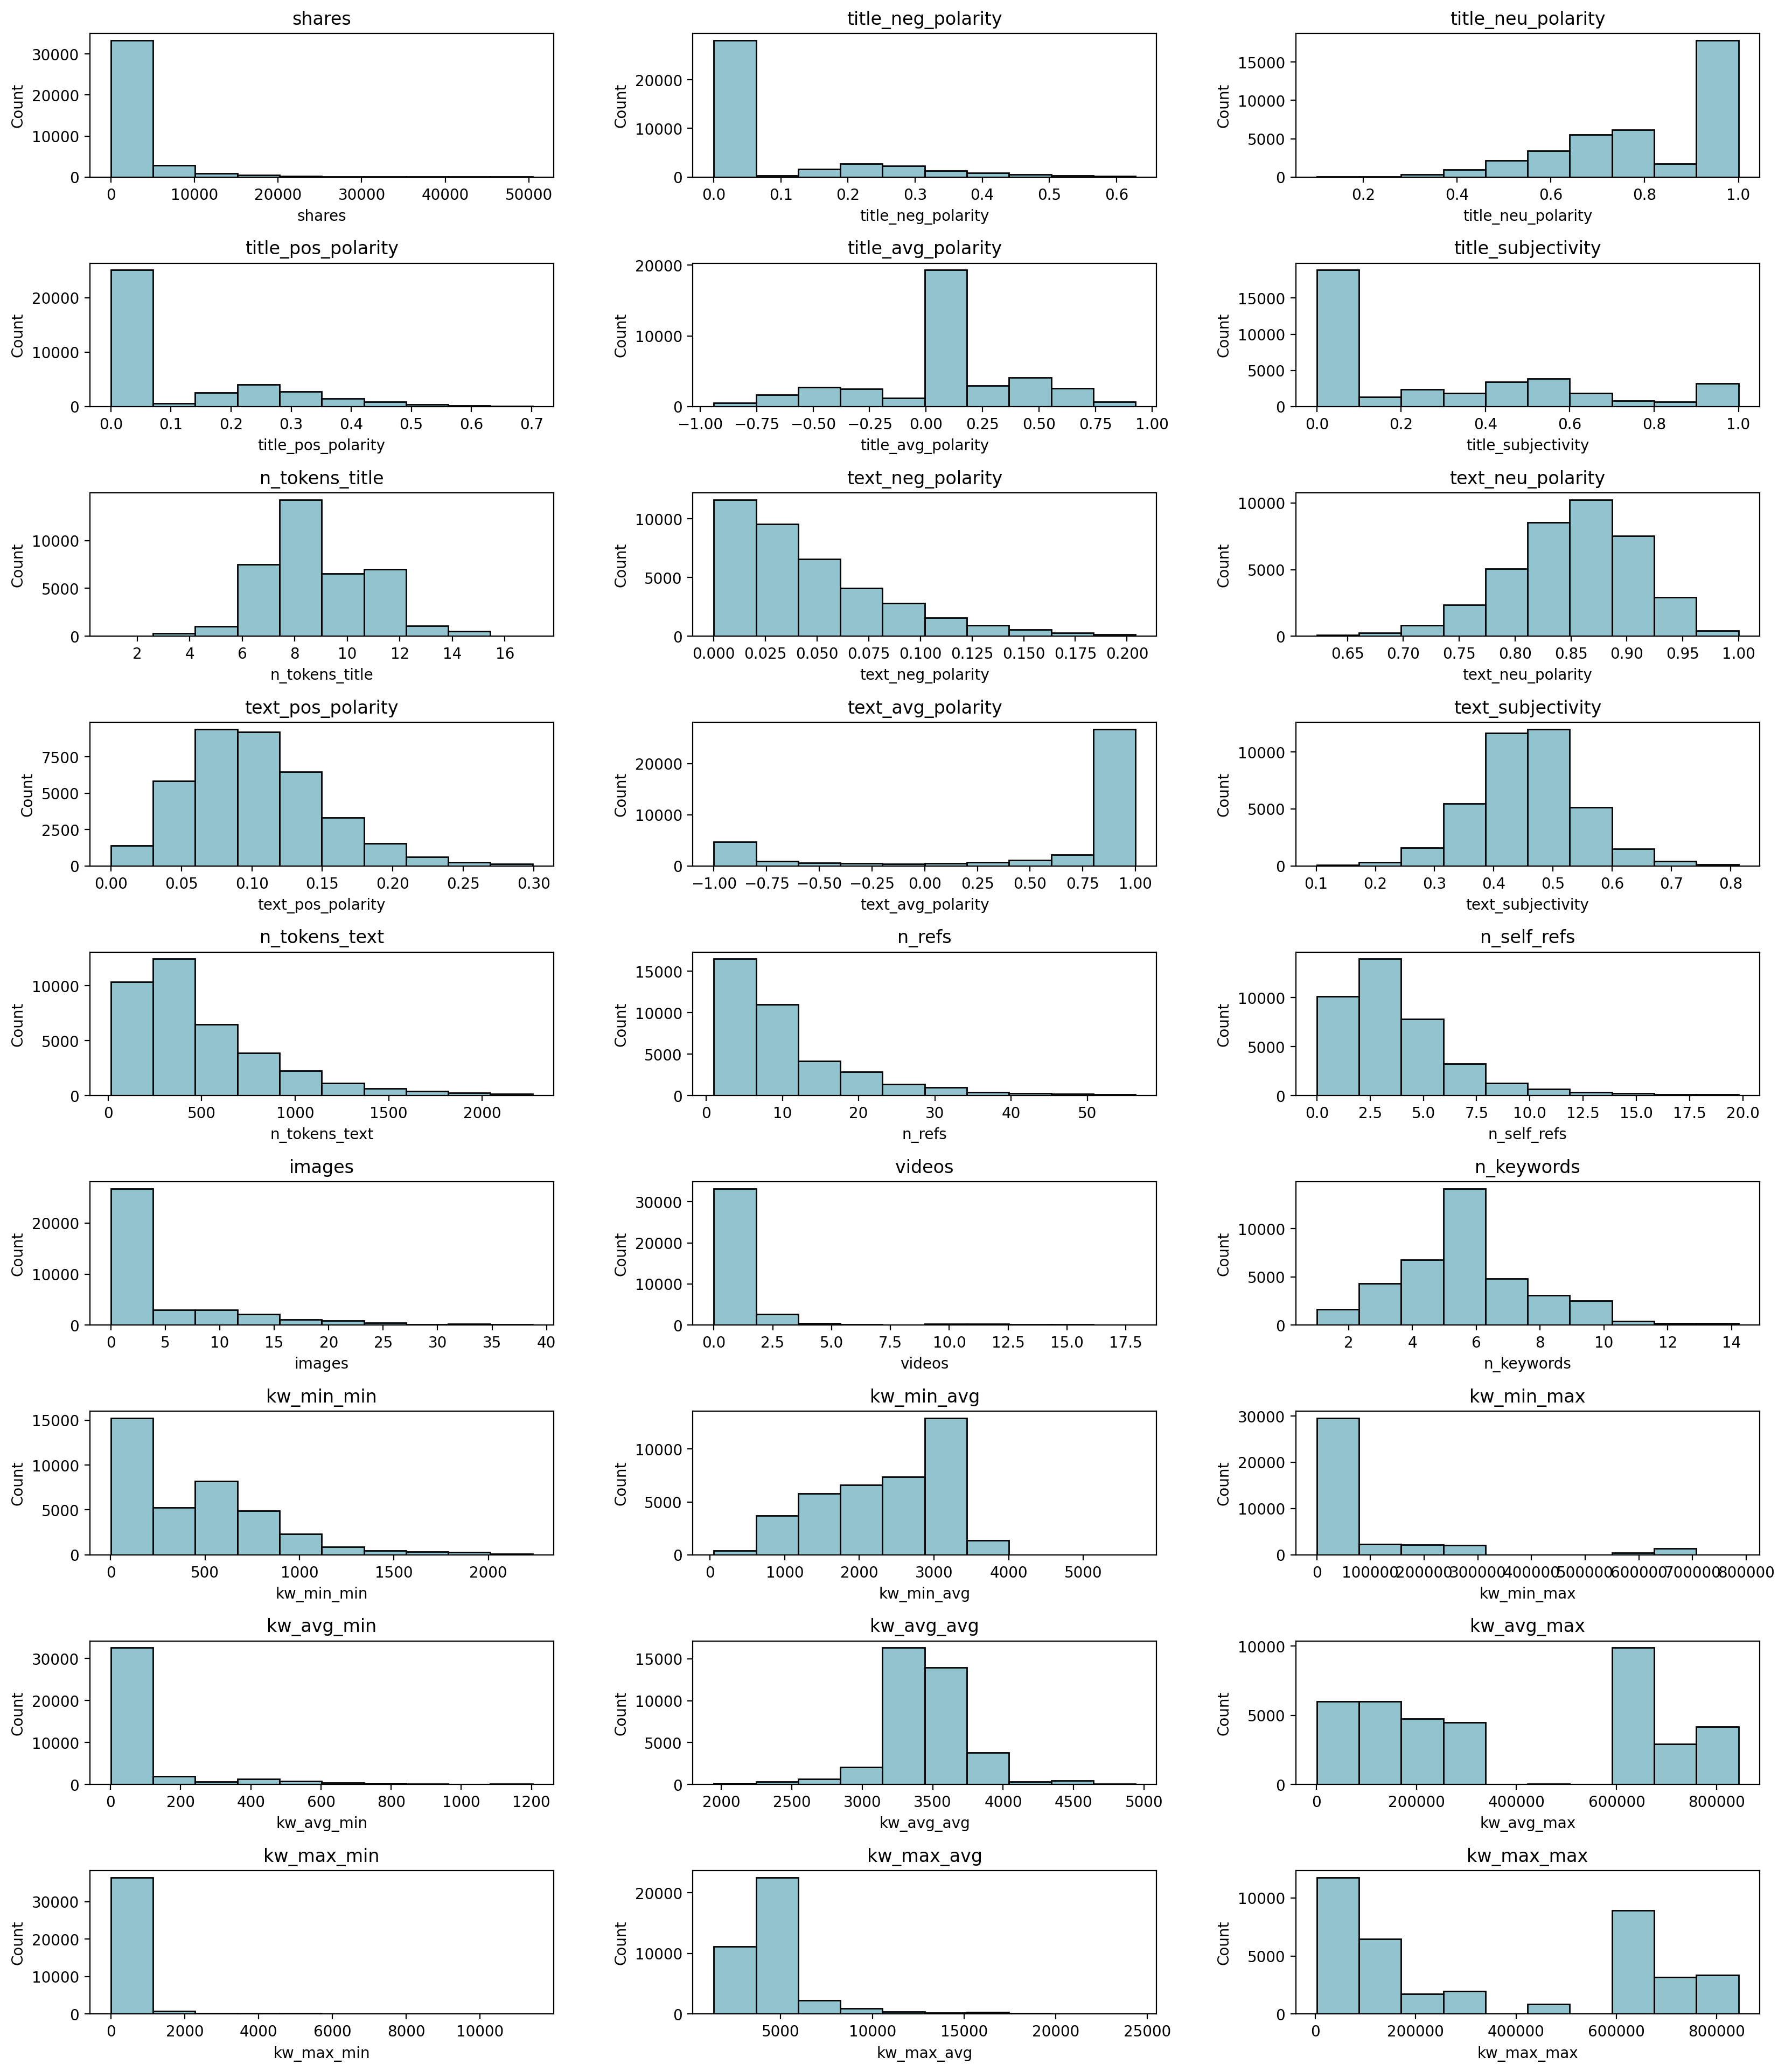

In [4]:
# set the range based on multiples of the std
times = 4

# collect all numeric feautres
data_numeric = data.select_dtypes(include='number')

# set up plots
plt.figure(figsize=(h*5,w*5),dpi=dpi)
plt.subplots_adjust(hspace=0.6,wspace=0.3)

for n,column in enumerate(data_numeric.columns):
    # set up variables
    std = data_numeric[column].std()
    mean = data_numeric[column].mean()
    min_lim = data_numeric[column].min()
    max_lim = data_numeric[column].max()
    # min lim
    if min_lim < mean-std*times:
        min_lim = mean-std*times
    if max_lim > mean+std*times:
        max_lim = mean+std*times
    # create plot
    plt.subplot(11,3,n+1)        
    sns.histplot(data=data_numeric,x=column,color=c1,bins=10,legend=False,binrange=(min_lim,max_lim))
    plt.title(column)

np.seterr(divide='ignore', invalid='ignore')

It seems a lot of articles share similar qualities, but that there's still quite a wide spread of values amongst them. Overall, it appears that mashable articles tend have:

-Typically neutral and unsubjective titles
    - although there do seem to be small normal distributions within these features with local means of -0.5 and 0.5 for negative and positive polarity respectively and 0.5 for subjectivity
- Typically more positive and subjective text
- About 200 words per article 
- About 5 references 
- Less than 5 images and videos
- 6 keywords

### Data Channels

In [5]:
data_channels = data.groupby('channel').agg(['count','sum','median','mean'])['shares'].astype(int)
data_channels.sort_values('count')

,count,sum,median,mean
channel,,,,
Social Good,322,1361753,1600,4229
U.S.,883,3673081,1400,4159
Culture,5237,19183936,1500,3663
Business,6174,21239003,1400,3440
Tech,7258,25204432,1500,3472
World,7614,24078927,1400,3162
Entertainment,10770,35488242,1400,3295


Seems like there are way less `Social Good` and `U.S.` articles so I'll combine these into one category labeled `Other`.

In [6]:
# make the label swap
data['channel'] = data['channel'].replace({'Social Good':'Other','U.S.':'Other'})

# take a look at the channels again
data_channels = data.groupby('channel').agg(['count','sum','median','mean'])['shares'].astype(int)
data_channels.sort_values('count')

,count,sum,median,mean
channel,,,,
Other,1205,5034834,1400,4178
Culture,5237,19183936,1500,3663
Business,6174,21239003,1400,3440
Tech,7258,25204432,1500,3472
World,7614,24078927,1400,3162
Entertainment,10770,35488242,1400,3295


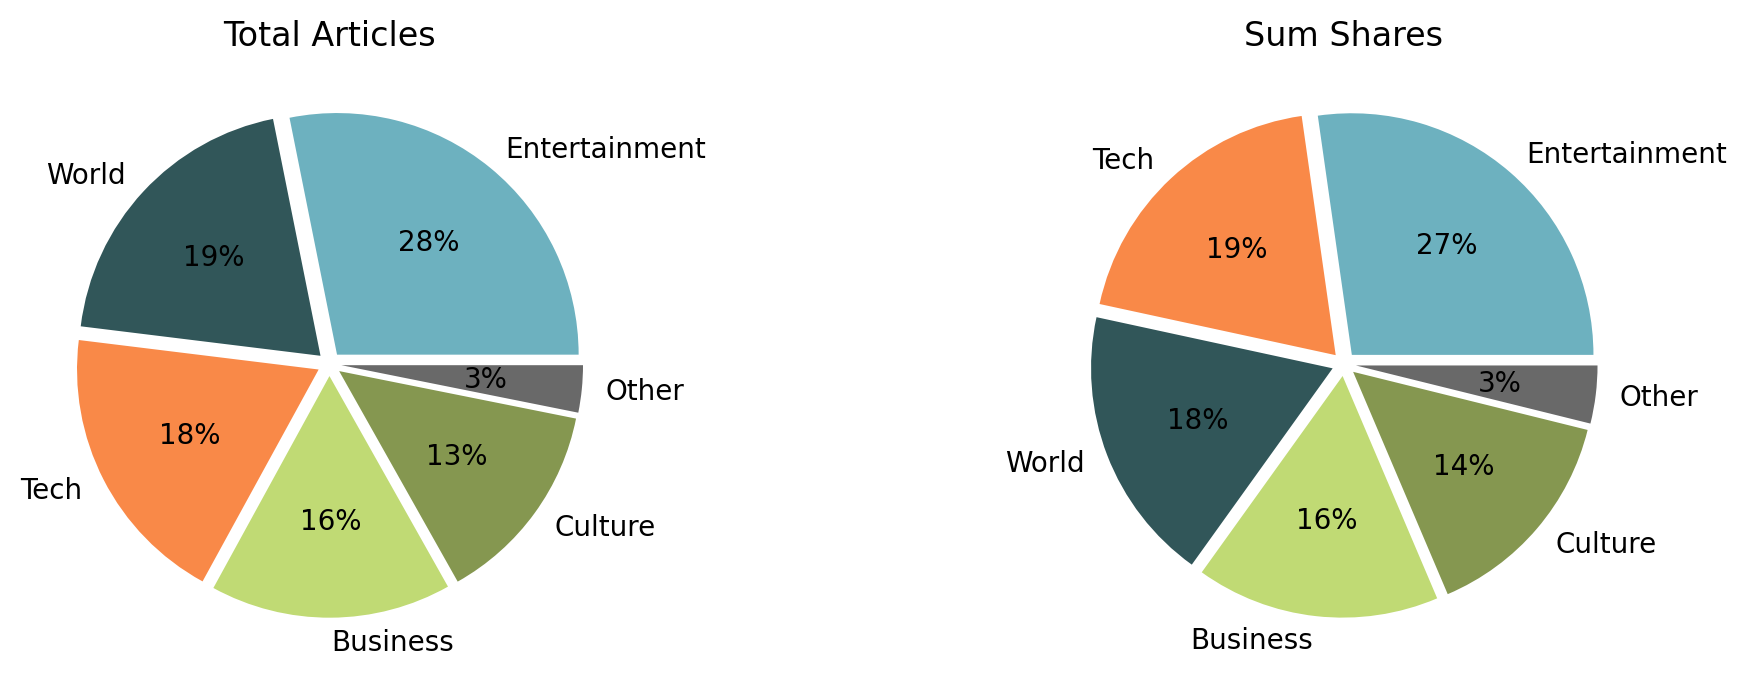

In [7]:
dc_counts = data_channels.sort_values('count',ascending=False)['count']
dc_shares = data_channels.sort_values('sum',ascending=False)['sum']
explode = [0.05 for var in dc_counts.index]

plt.figure(figsize=(w*2,h),dpi=dpi)
plt.subplot(121)
plt.pie(x=dc_counts,labels=dc_counts.index,autopct="%d%%",explode=explode,colors=[c1,c2,c3,c4,c5,'#696969'])
plt.title('Total Articles')

plt.subplot(122)
plt.pie(x=dc_shares,labels=dc_shares.index,autopct="%d%%",explode=explode,colors=[c1,c3,c2,c4,c5,'#696969'])
plt.title('Sum Shares');

`Entertainment` by far appears to be the largest data channel with `Culture`, `U.S.`, and `Social Good` being the smallest. Comparing the sum of shares and the total articles, there does seem to be any one channel that sticks out as doing better. The only thing I could bring up, is that `Tech` may be slightly more popular that `World`

### Weekday

In [8]:
weekday = data.groupby('weekday').agg(['count','sum','median','mean'])['shares'].astype(int)
weekday.sort_values('count')

,count,sum,median,mean
weekday,,,,
Sunday,2359,8909051,1800,3776
Saturday,2630,10549632,1800,4011
Friday,5827,19370272,1500,3324
Monday,6136,21368571,1400,3482
Tuesday,6973,23580632,1300,3381
Thursday,7065,22374288,1400,3166
Wednesday,7268,24076928,1300,3312


`Saturday` and `Sunday` have less than half the articles published on weekdays, yet their mean and median shares are the highest. For consistency, I’ll combine these two into the category `Weekend`. 

In [9]:
# make the label swap
data['weekday'] = data['weekday'].replace({'Saturday':'Weekend','Sunday':'Weekend'})

# take a look at the publish days again
weekday = data.groupby('weekday').agg(['count','sum','median','mean'])['shares'].astype(int)
weekday.sort_values('count')

,count,sum,median,mean
weekday,,,,
Weekend,4989,19458683,1800,3900
Friday,5827,19370272,1500,3324
Monday,6136,21368571,1400,3482
Tuesday,6973,23580632,1300,3381
Thursday,7065,22374288,1400,3166
Wednesday,7268,24076928,1300,3312


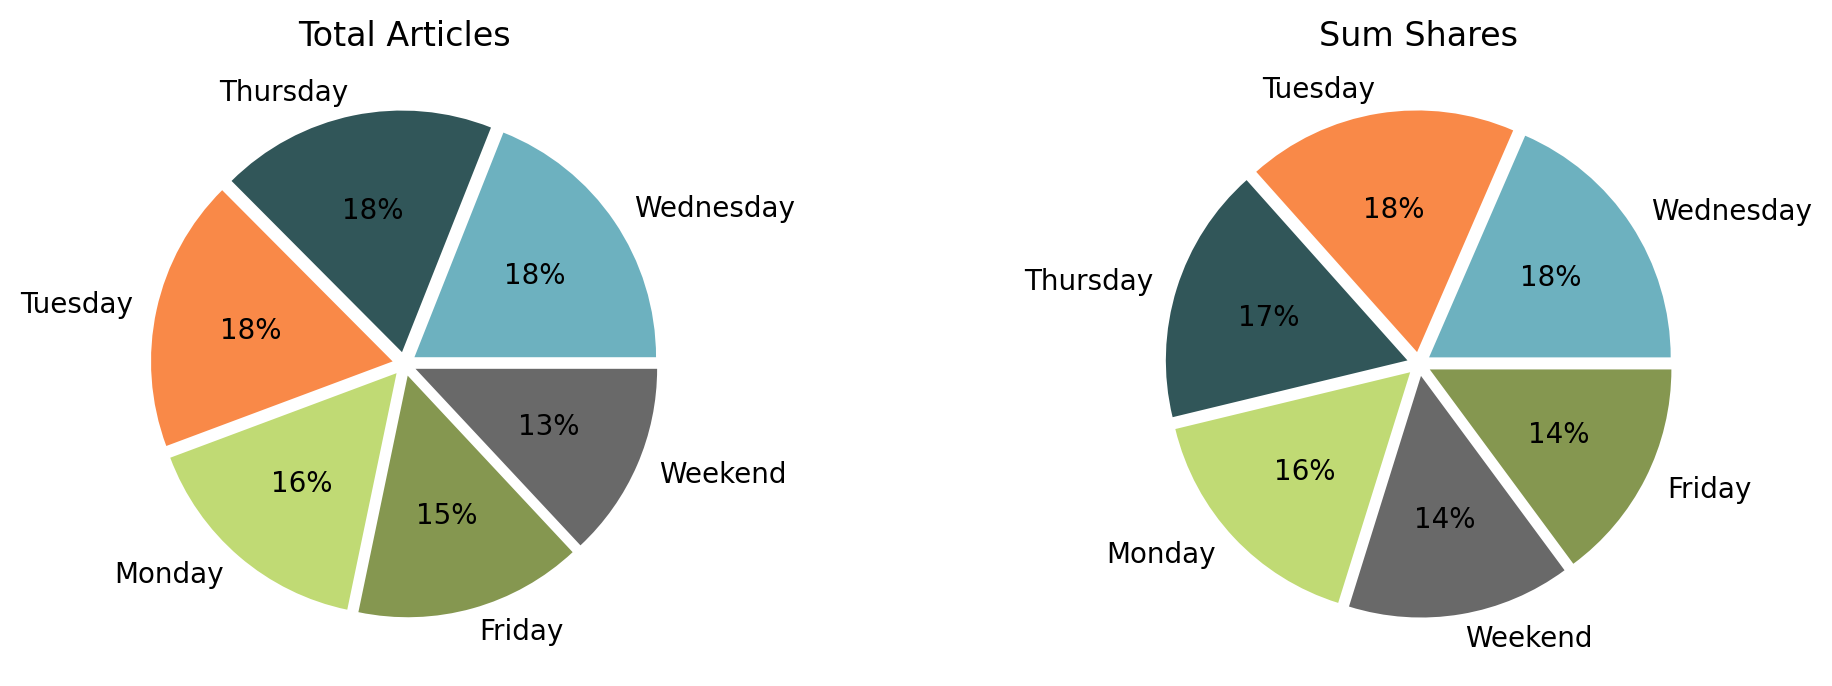

In [10]:
w_counts = weekday.sort_values('count',ascending=False)['count']
w_shares = weekday.sort_values('sum',ascending=False)['sum']
explode = [0.05 for var in w_counts.index]

plt.figure(figsize=(w*2,h),dpi=dpi)
plt.subplot(121)
plt.pie(x=w_counts,labels=w_counts.index,autopct="%d%%",explode=explode,colors=[c1,c2,c3,c4,c5,'#696969'])
plt.title('Total Articles')

plt.subplot(122)
plt.pie(x=w_shares,labels=w_shares.index,autopct="%d%%",explode=explode,colors=[c1,c3,c2,c4,'#696969',c5])
plt.title('Sum Shares');

Compared to the data channels, the amount of articles published each day is a bit more balanced. Once again, comparing the total articles to the sum of the shares, there are no stand out difference beside the fact that `Tuesday` articles may perform better than `Thursday` articles and `Weekend` articles do slightly better than `Friday` articles.


### Shares with Time

In [11]:
from datetime import datetime 

data['date'] = pd.to_datetime(data['date'])
date = data.set_index('date').resample('w').agg(['count','median','max','mean'])['shares']

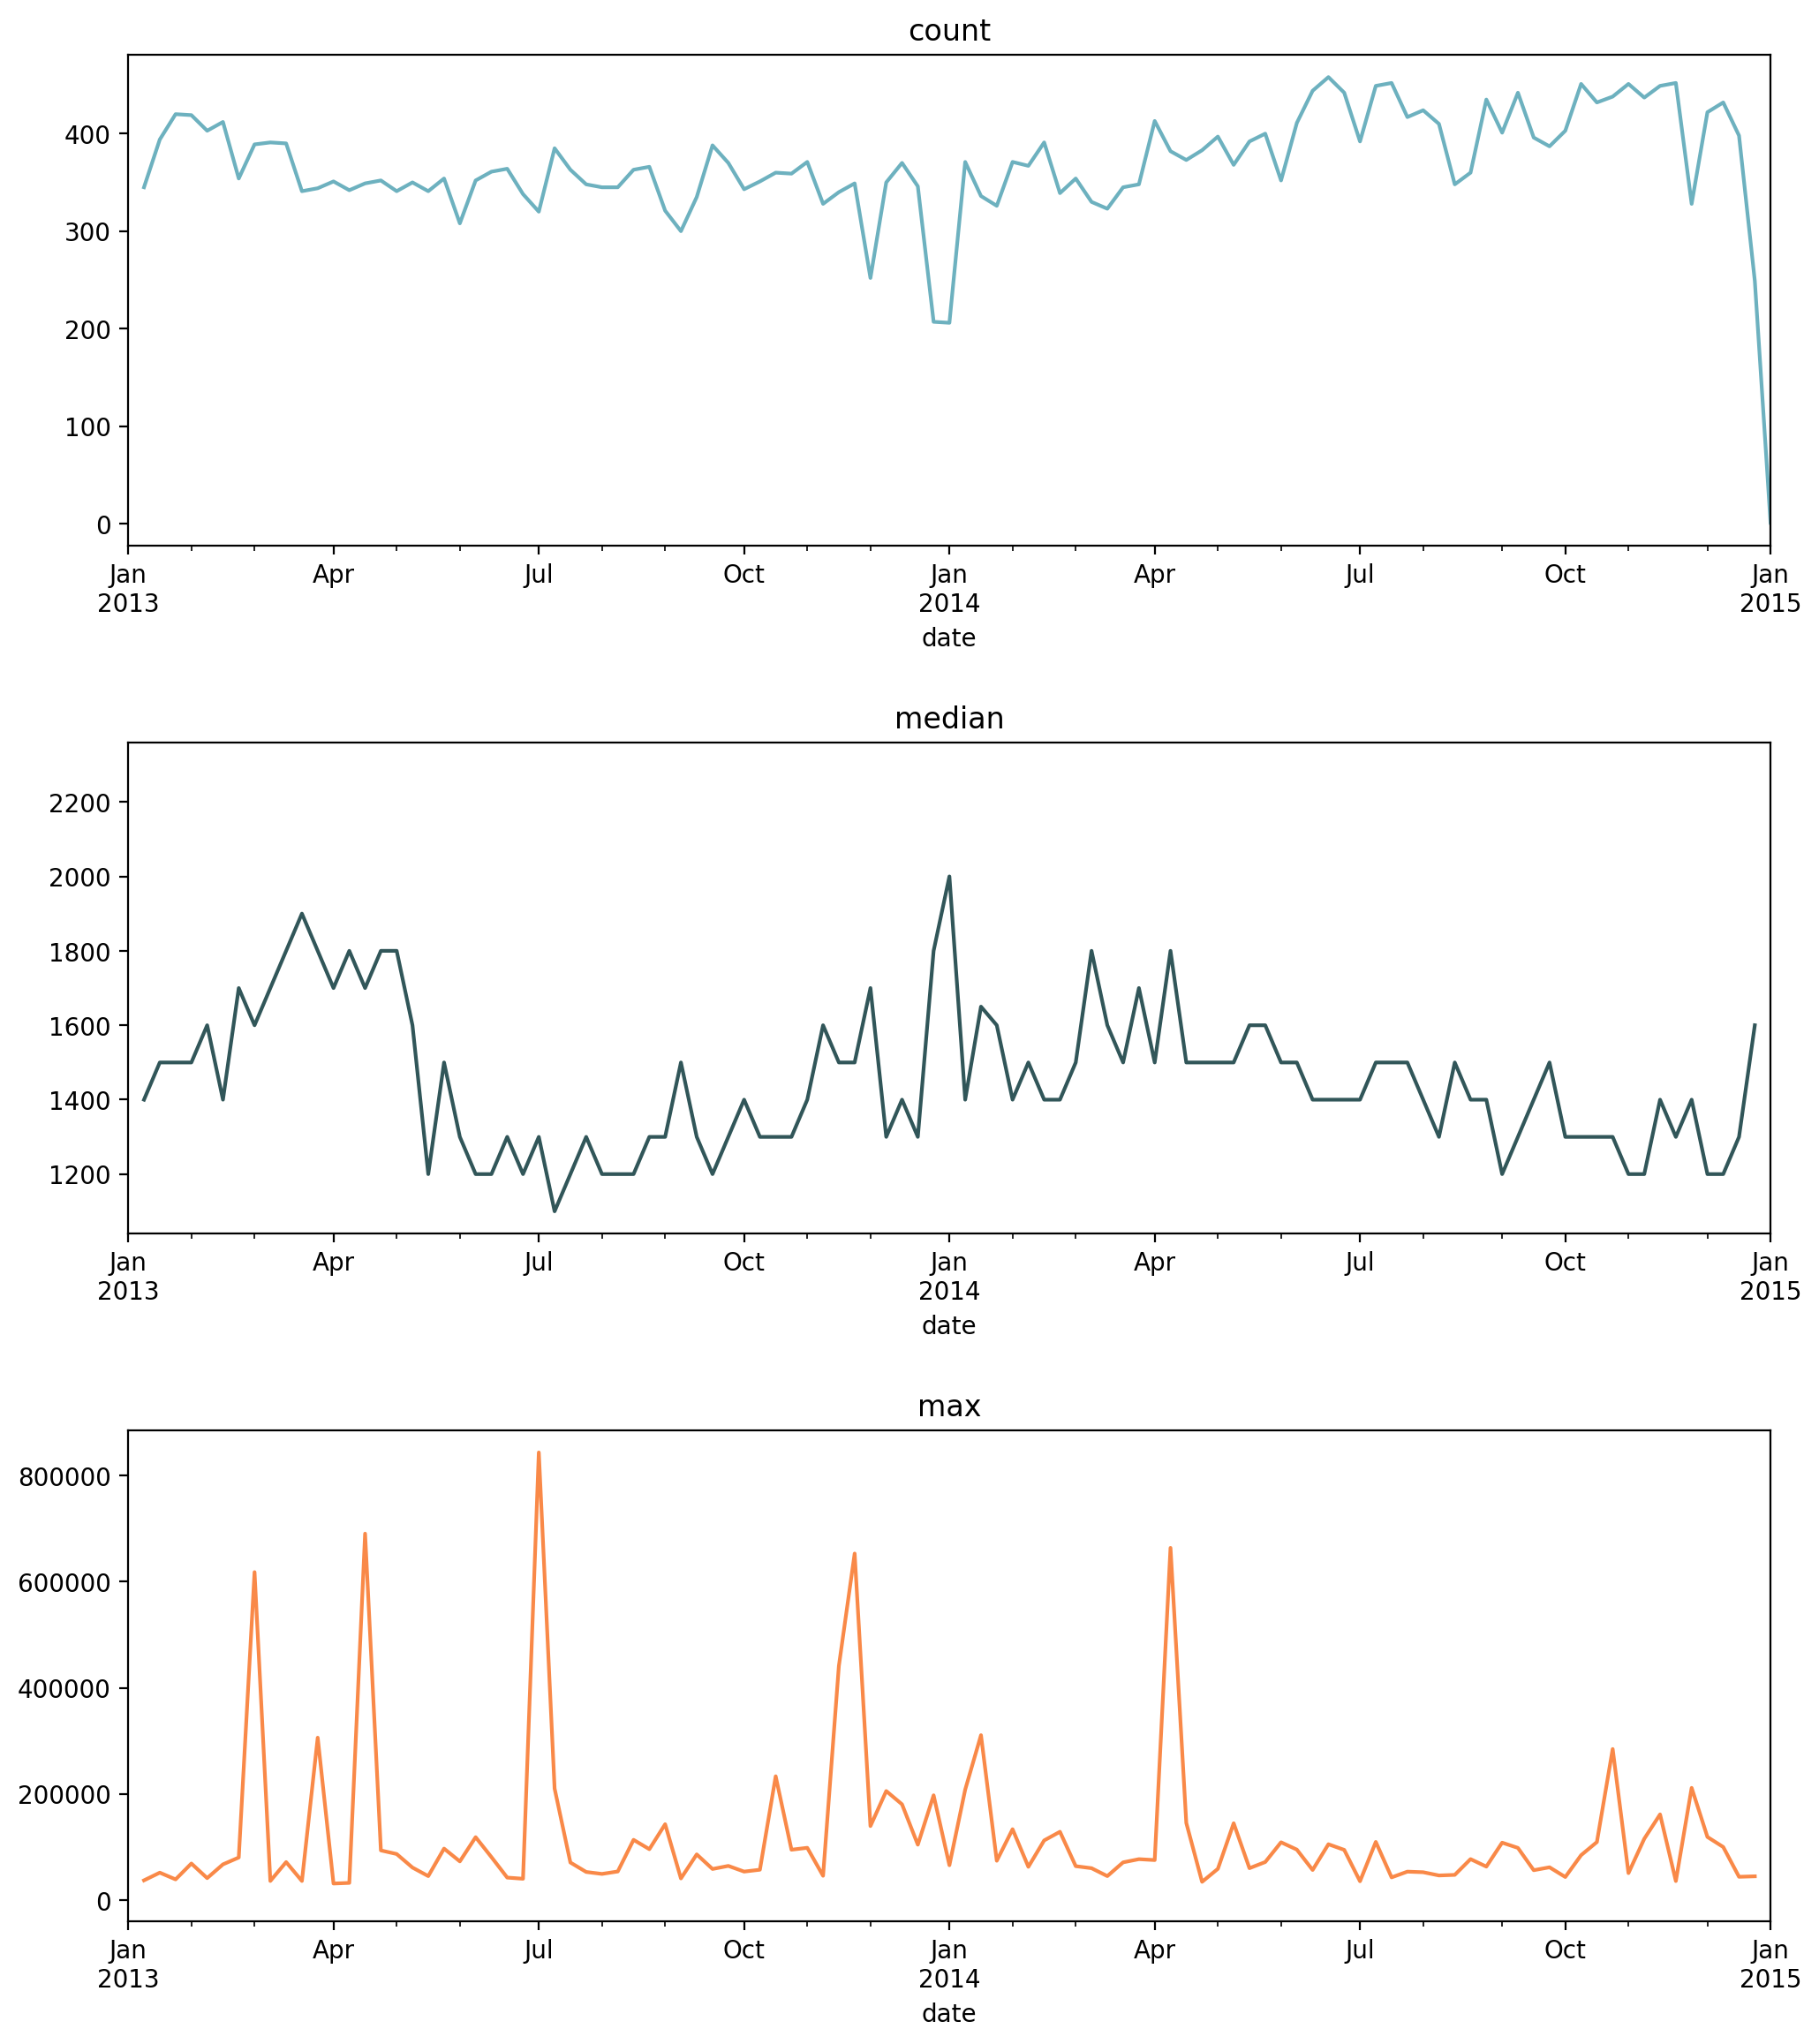

In [12]:
def plot_dates(column,n,c):
    plt.subplot(n)
    date[column].plot(c=c)
    plt.xlim([datetime(2013, 1, 1), datetime(2014, 12, 30)])
    plt.title(column)

plt.figure(figsize=(w*2,h*3.5),dpi=dpi)
plt.subplots_adjust(hspace=0.4)

for col,n,c in [('count',311,c1),('median',312,c2),('max',313,c3)]:
    plot_dates(col,n,c);

Seems like Mashable’s been publishing more articles over time. Rather consistently it seems the least amount of articles are published near new years, understandable because a majority of staff is probably on vacation.

In terms of the median shares per week, it seems like in the latter year Mashable articles haven’t been receiving as many shares. There also does seem to be some seasonality but I’ll investigate that further in just a second.

Looking at the max shares per week, we find two kinds of popular articles. **Viral Article** are the outliers that go above and beyond, gaining more than 100,000 shares and visible on the graph as the tall, steep peaks. While these are included in the general category of **Popular Articles** it’s good to denote the difference as these articles have managed to capture a significantly wider audience.

### Seasonality

It’s hard to tell considering this dataset only covers two years, but I think I see a seasonal trend in the median shares. I’m going to use statsmodels’s seasonal_decompose to investigate this a little further.


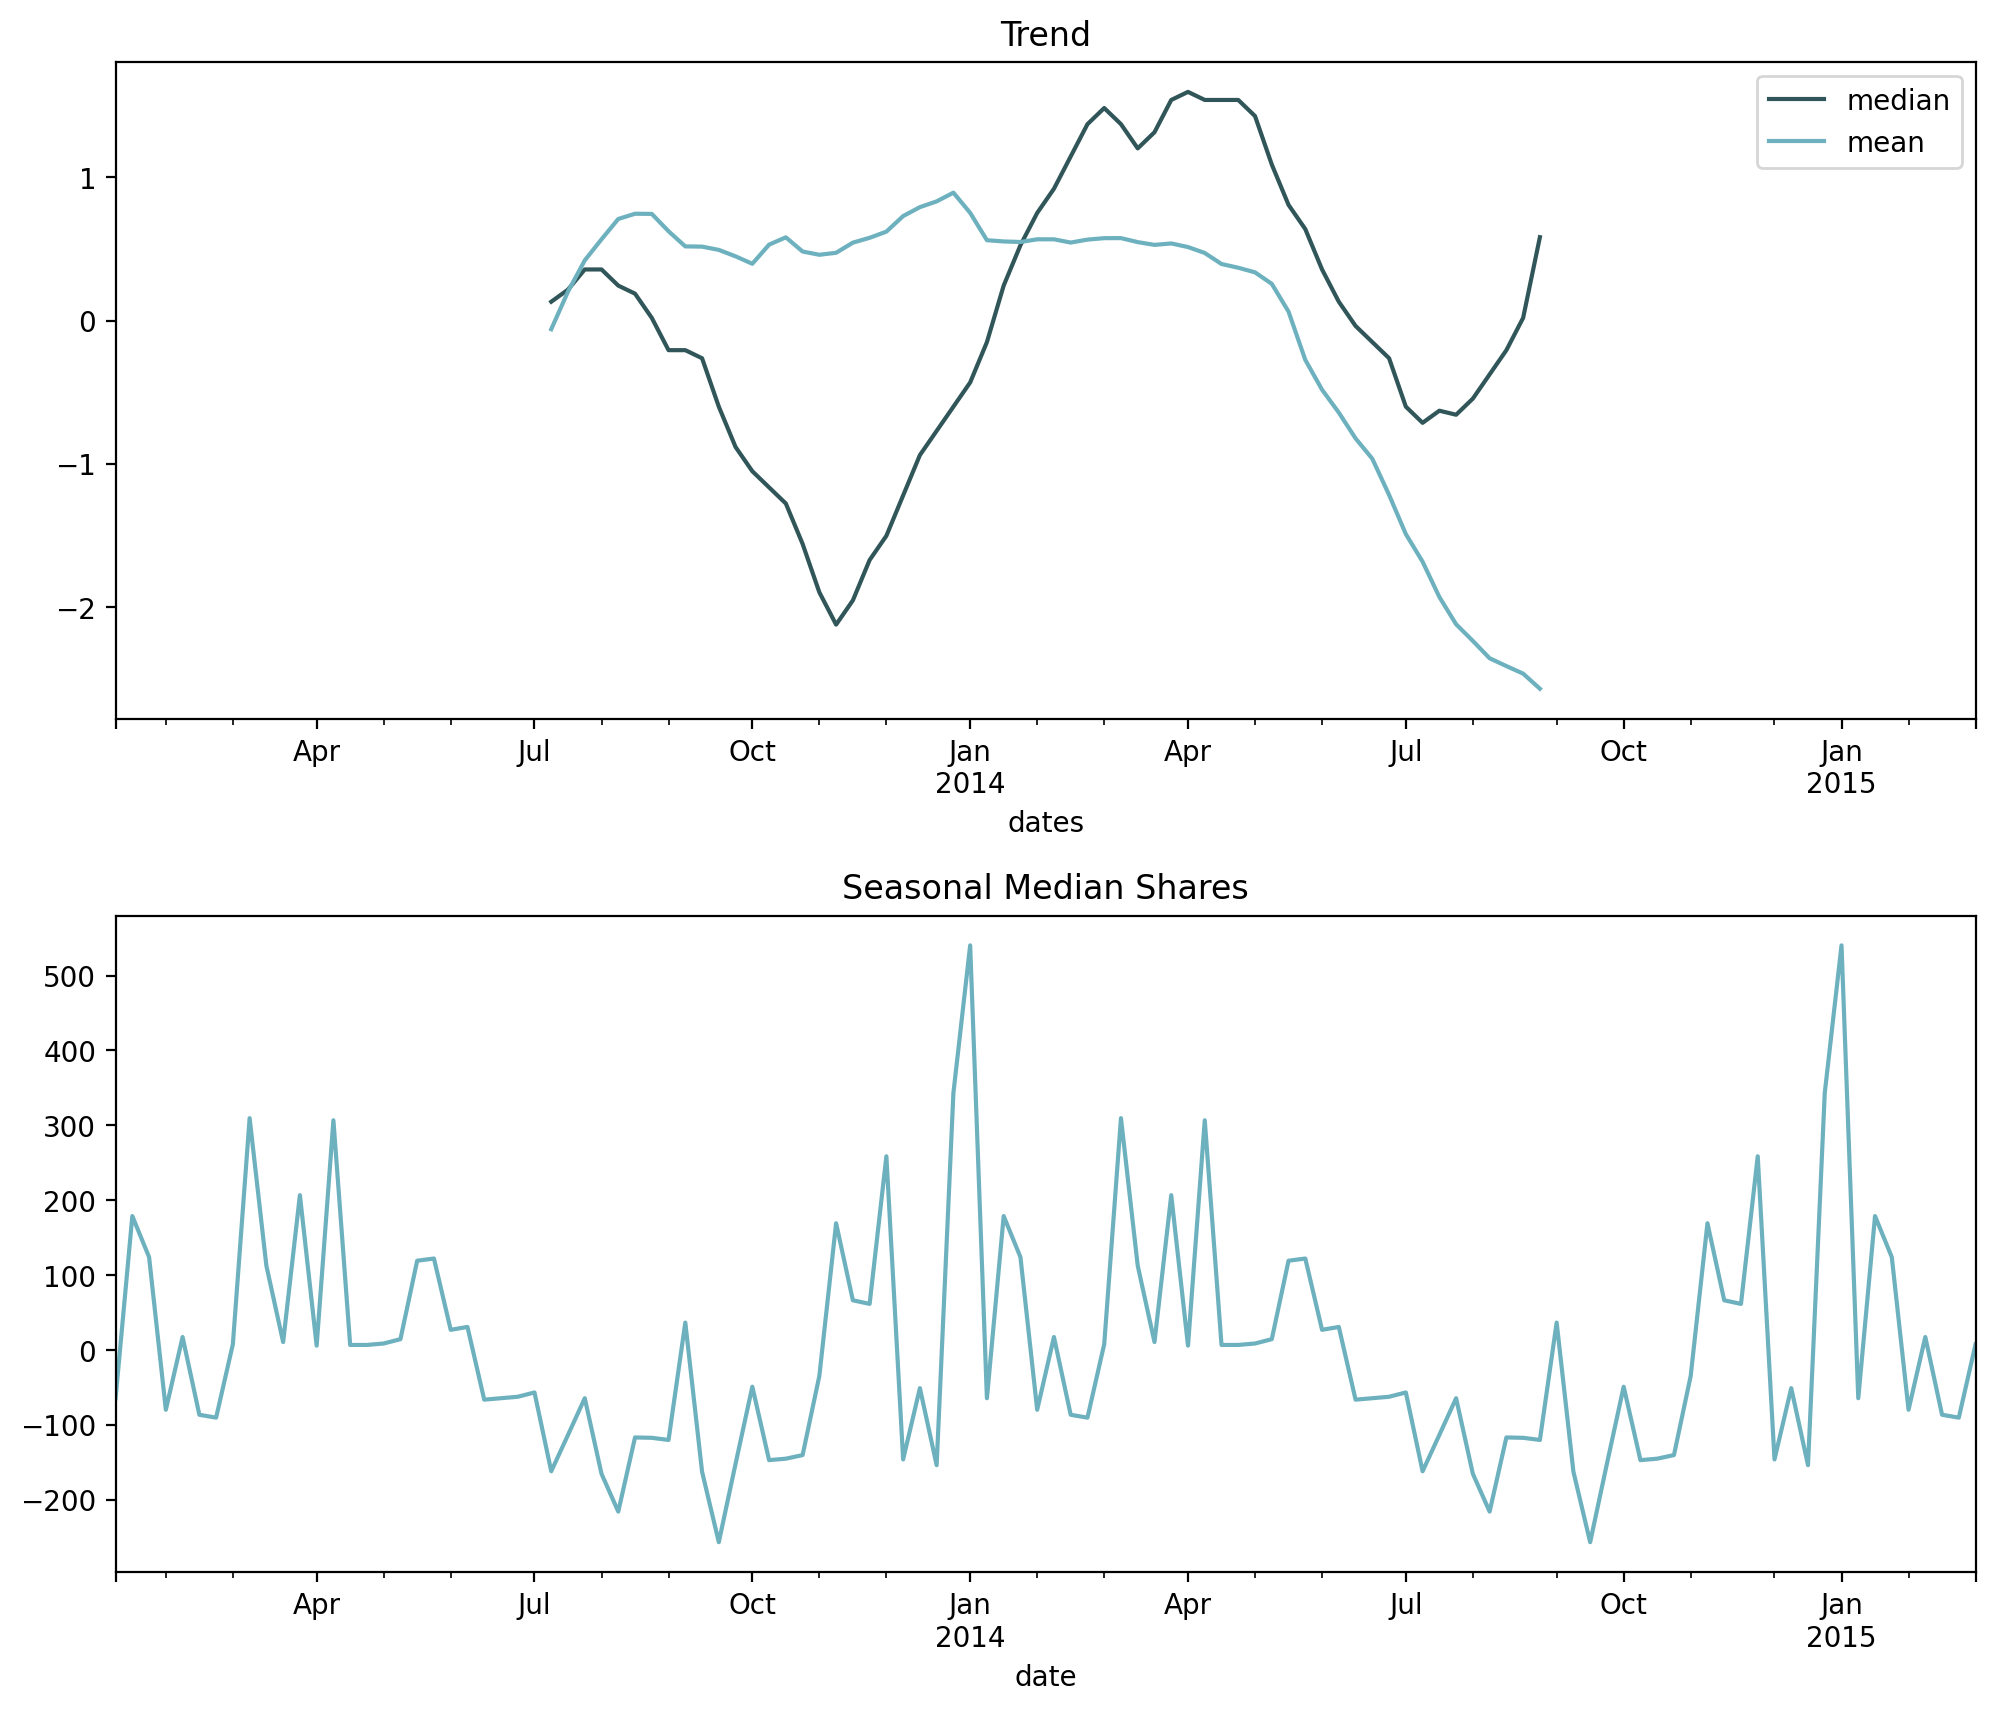

In [30]:
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

scaler = StandardScaler()

ssnl_dcmps_mean = seasonal_decompose(date['mean'].fillna(method='ffill'))
ssnl_dcmps_median = seasonal_decompose(date['median'].fillna(method='ffill'))

trend = ssnl_dcmps_mean.trend.values, ssnl_dcmps_median.trend.values

tsa_data = pd.DataFrame({'dates':ssnl_dcmps_mean.trend.index})
tsa_data['trend_mean'] = scaler.fit_transform(trend[0].reshape(-1,1))
tsa_data['trend_median'] = scaler.fit_transform(trend[1].reshape(-1,1))
tsa_data = tsa_data.set_index('dates')

plt.figure(figsize=(w*2,h*2.5),dpi=dpi)
plt.subplots_adjust(hspace=0.3)

plt.subplot(211)
tsa_data['trend_median'].plot(label='median',c=c2)
tsa_data['trend_mean'].plot(label='mean',c=c1)
plt.title('Trend')
plt.legend()

plt.subplot(212)
ssnl_dcmps_median.seasonal.plot(c=c1)
plt.title('Seasonal Median Shares');

Based on this analysis, it would appear that my hunch is correct. The yearly seasonality seems to be a general increase in shares during winter and spring and drop in late summer/early fall.
 
The trend graphs show what the overall trend may be without seasonality, but due to the limited points, the shapes are a bit hard to make out. Still, it does appear that the median shares may be growing albeit with a little bit of an oscillation. On the other hand, the mean shares seem to be drastically dropping. This may mean that while the typical mashable article is getting more attention, the popular, and more specifically viral, articles have not been performing as well. 


# Keywords
Using the scraped keywords, I tried to refine the origional keyword features so I can see what keywords are preforming well

In [32]:
keyword_columns = [col for col in data.columns if 'kw' in col]
keywords = data[keyword_columns]
keywords.describe().astype(int)

,kw_min_min,kw_min_avg,kw_min_max,kw_avg_min,kw_avg_avg,kw_avg_max,kw_max_min,kw_max_avg,kw_max_max
count,38257,38257,38257,38257,38257,38257,38257,38257,38257
mean,450,2375,88694,100,3442,395805,511,4900,346152
std,445,831,174177,275,374,283107,2727,4863,299792
min,1,50,50,1,923,1100,1,1352,2900
25%,60,1709,3500,8,3261,141400,41,3610,64400
50%,408,2524,14000,42,3438,310800,70,3869,200100
75%,669,3118,72900,57,3578,652900,438,4582,652900
max,18800,18800,843300,18800,20877,843300,141400,150350,843300


In [38]:
top_keywords = pd.DataFrame()

for column in ['kw_min','kw_avg','kw_max']:
    top_keywords[column] = keywords[column].value_counts().head().index

top_keywords

,kw_min,kw_avg,kw_max
0,World,World,Gadgets
1,Business,Entertainment,U.S.
2,Sports,Tech,Tech
3,Television,Business,Entertainment
4,Entertainment,Culture,Culture


It seems the most common keywords are the article data channels. Of these it appears that tech is the most successful. But what if we remove these, what keywords OTHER THAN the data channels seem to be the most popular?

In [67]:
top_keywords = pd.DataFrame()
data_channels = ['World','Business','Tech', 'Culture','U.S.','Social Good','Entertainment']

for column in ['kw_min','kw_avg','kw_max']:
    no_dc = keywords.drop(index=keywords[keywords[column].isin(data_channels)].index)
    top_keywords[column] = no_dc[column].value_counts().head().index

top_keywords

,kw_min,kw_avg,kw_max
0,Sports,Apps and Software,Gadgets
1,Television,Video,Conversations
2,Space,Mobile,viral video
3,Media,Photography,Marketing
4,Apple,Lifestyle,Videos


It seems that `sports` is the most common worst performing keyword while `gadgets` is the most common best performing keyword. It is interesting that alot of these are related to tech.

### The Top (WIP)
The code beyond here is still old

In [15]:
viral_articles = data[data.shares >= 200000]
viral_articles.sort_values('shares',ascending=False).head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,kw_min_avg,kw_min_max,kw_avg,kw_avg_min,kw_avg_avg,kw_avg_max,kw_max,kw_max_min,kw_max_avg,kw_max_max
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/07/03/low-cost-iphone/,12.0,688.0,0.500734,1.0,0.643357,28.0,3.0,15.0,1.0,4.893895,...,3427,843300,iphone,43,4330,843300,iphone rumors,568,97434,843300
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/,11.0,893.0,0.517202,1.0,0.716730,17.0,11.0,0.0,11.0,4.586786,...,3431,690400,marketing,76,3789,690400,dove,544,49936,690400
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/,13.0,2591.0,0.237708,1.0,0.371091,27.0,4.0,1.0,1.0,4.588962,...,3431,690400,jobs,144,4457,663600,the first 100,642,64524,663600
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/,9.0,134.0,0.689394,1.0,0.851852,1.0,1.0,0.0,2.0,4.082090,...,3267,652900,creativity,596,40771,652900,yeezus,213,66531,652900
http://mashable.com/2013/03/02/wealth-inequality/,11.0,382.0,0.487805,1.0,0.605809,15.0,3.0,11.0,1.0,4.777487,...,3354,617900,videos,5,3666,617900,conversations,36,4365,690400


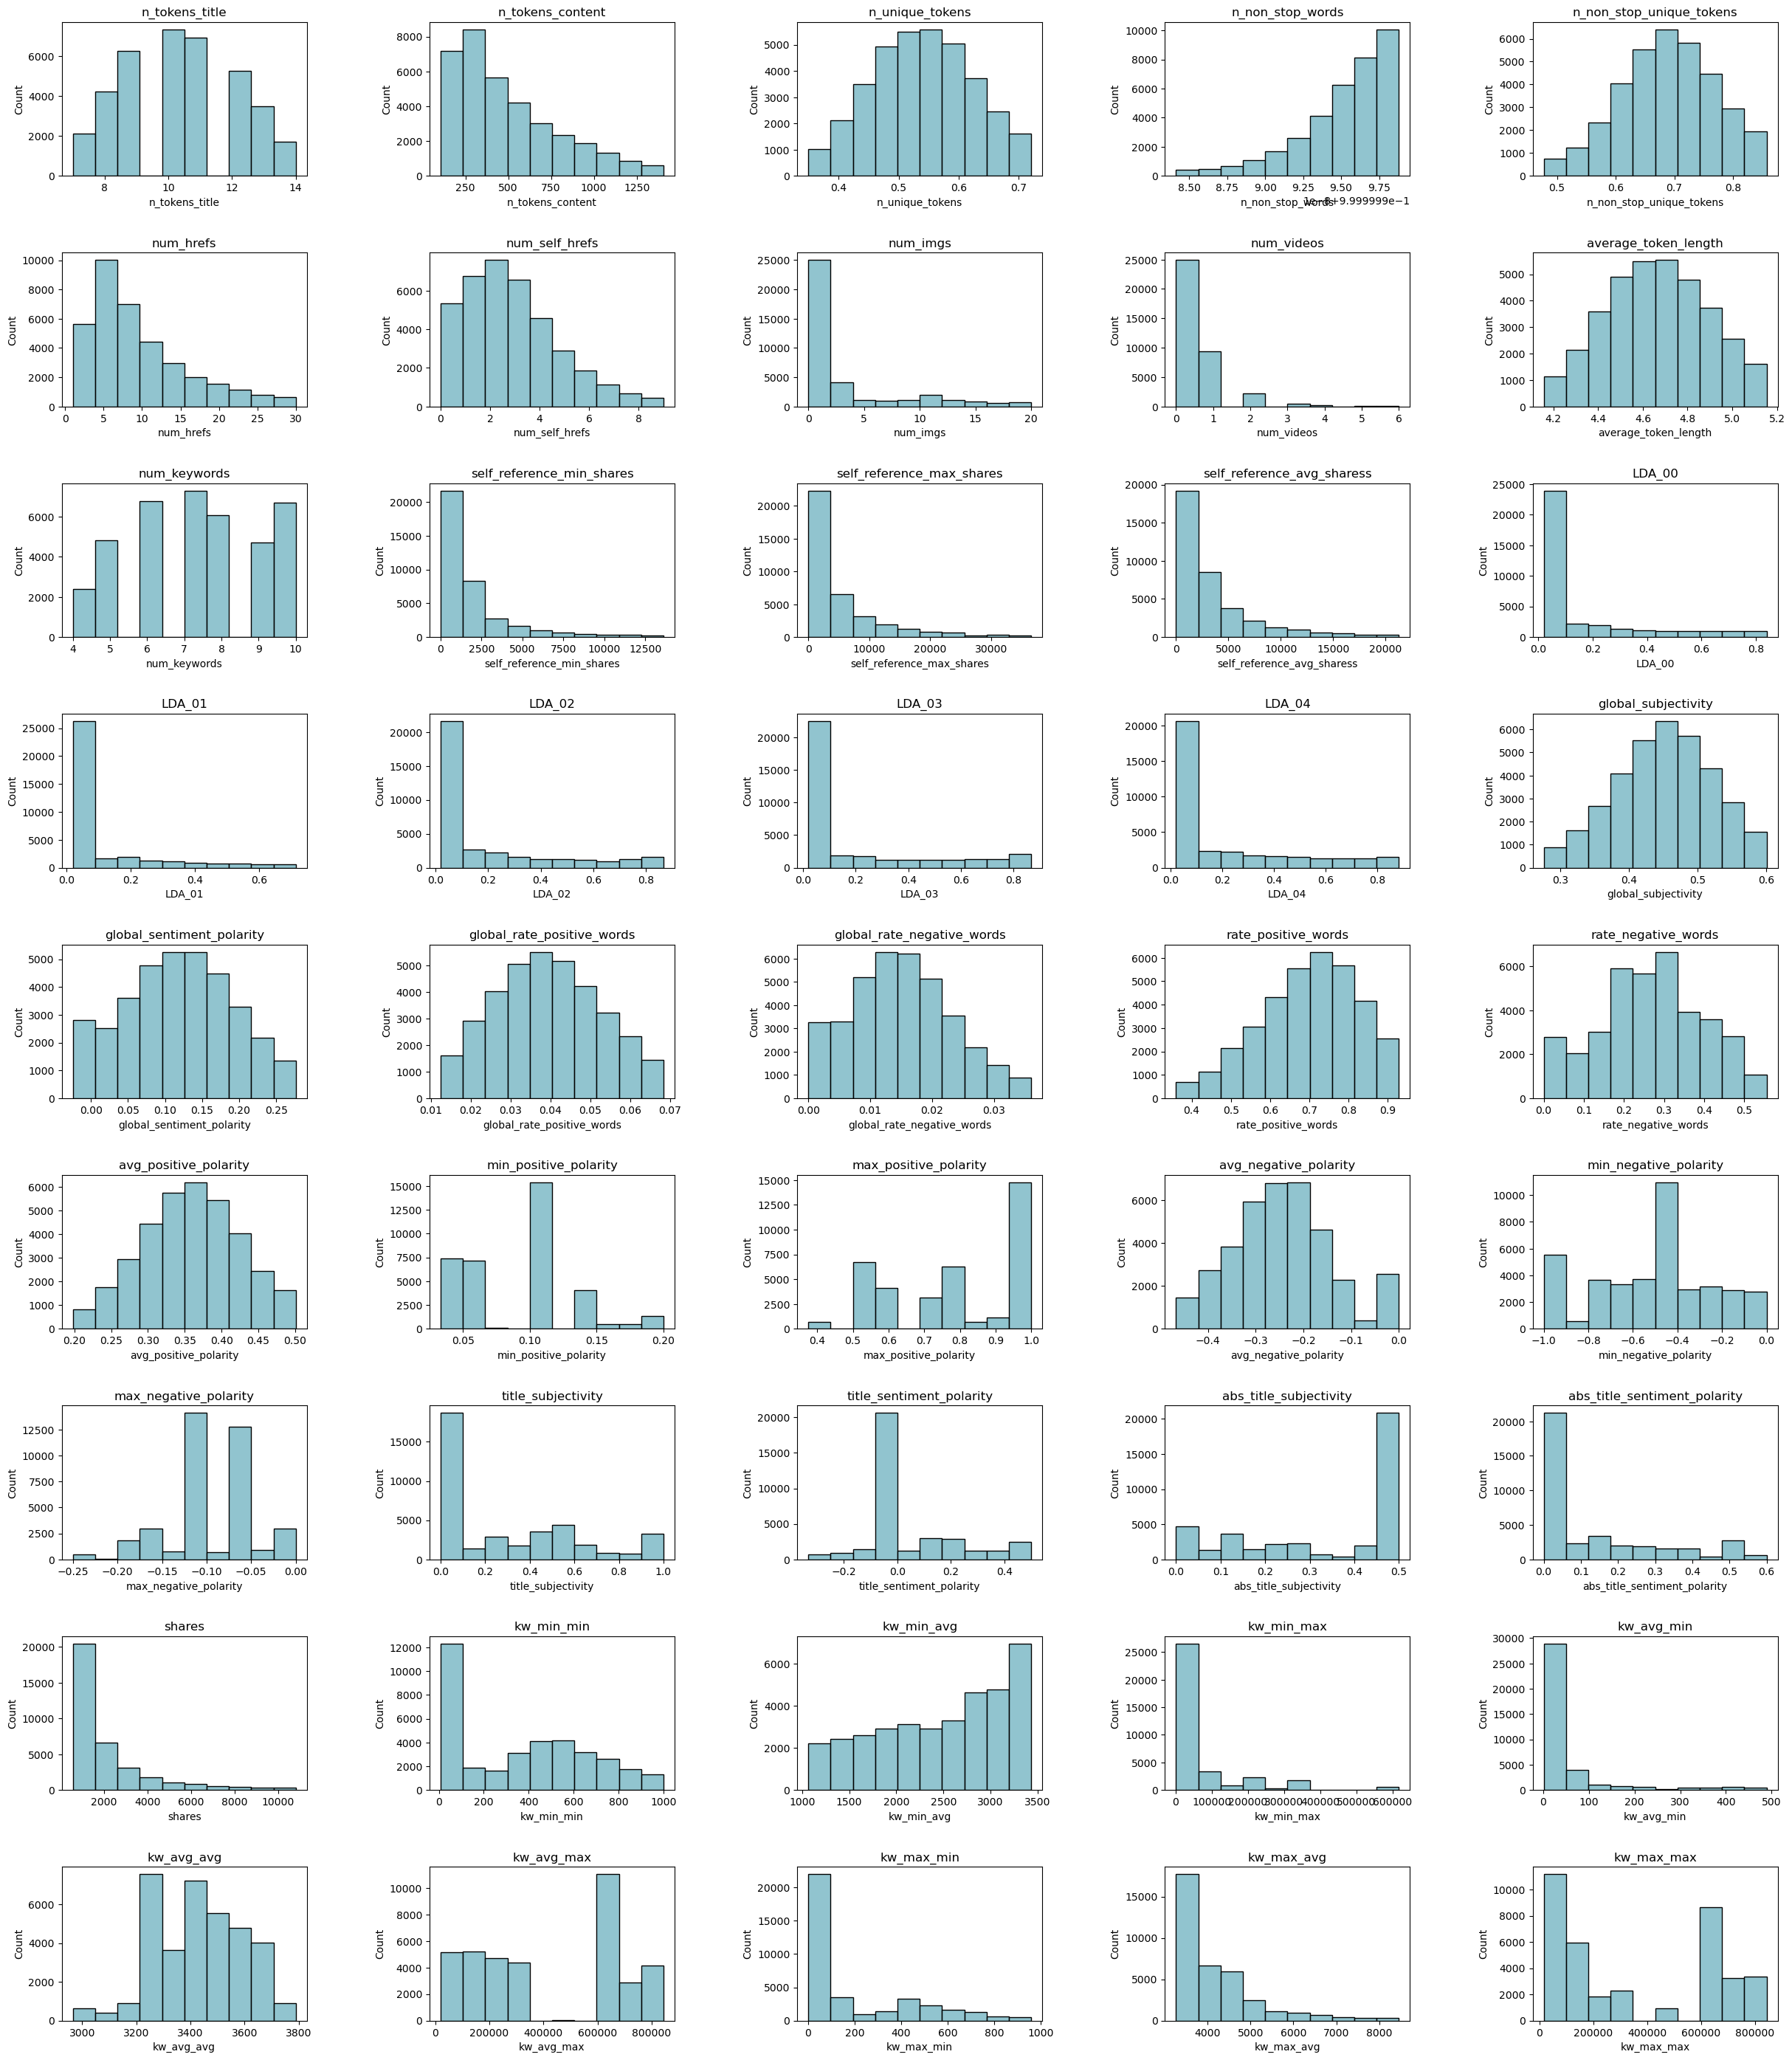

In [16]:
np.seterr(divide='ignore', invalid='ignore')

plt.figure(figsize=(30,40),dpi=100)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

n=1
for col_name in viral_articles.columns:
    if data[col_name].dtypes == int or data[col_name].dtypes == float:
        plt.subplot(10,5,n)
        range_lim = np.percentile(data[col_name],[5,95])
        sns.histplot(data=data,
                     x=col_name,
                     color=c1,
                     bins=10,
                     legend=False,
                     binrange=range_lim)
        plt.title(col_name)
        n+=1

Text(0.5, 1.0, 'Negative Correlation')

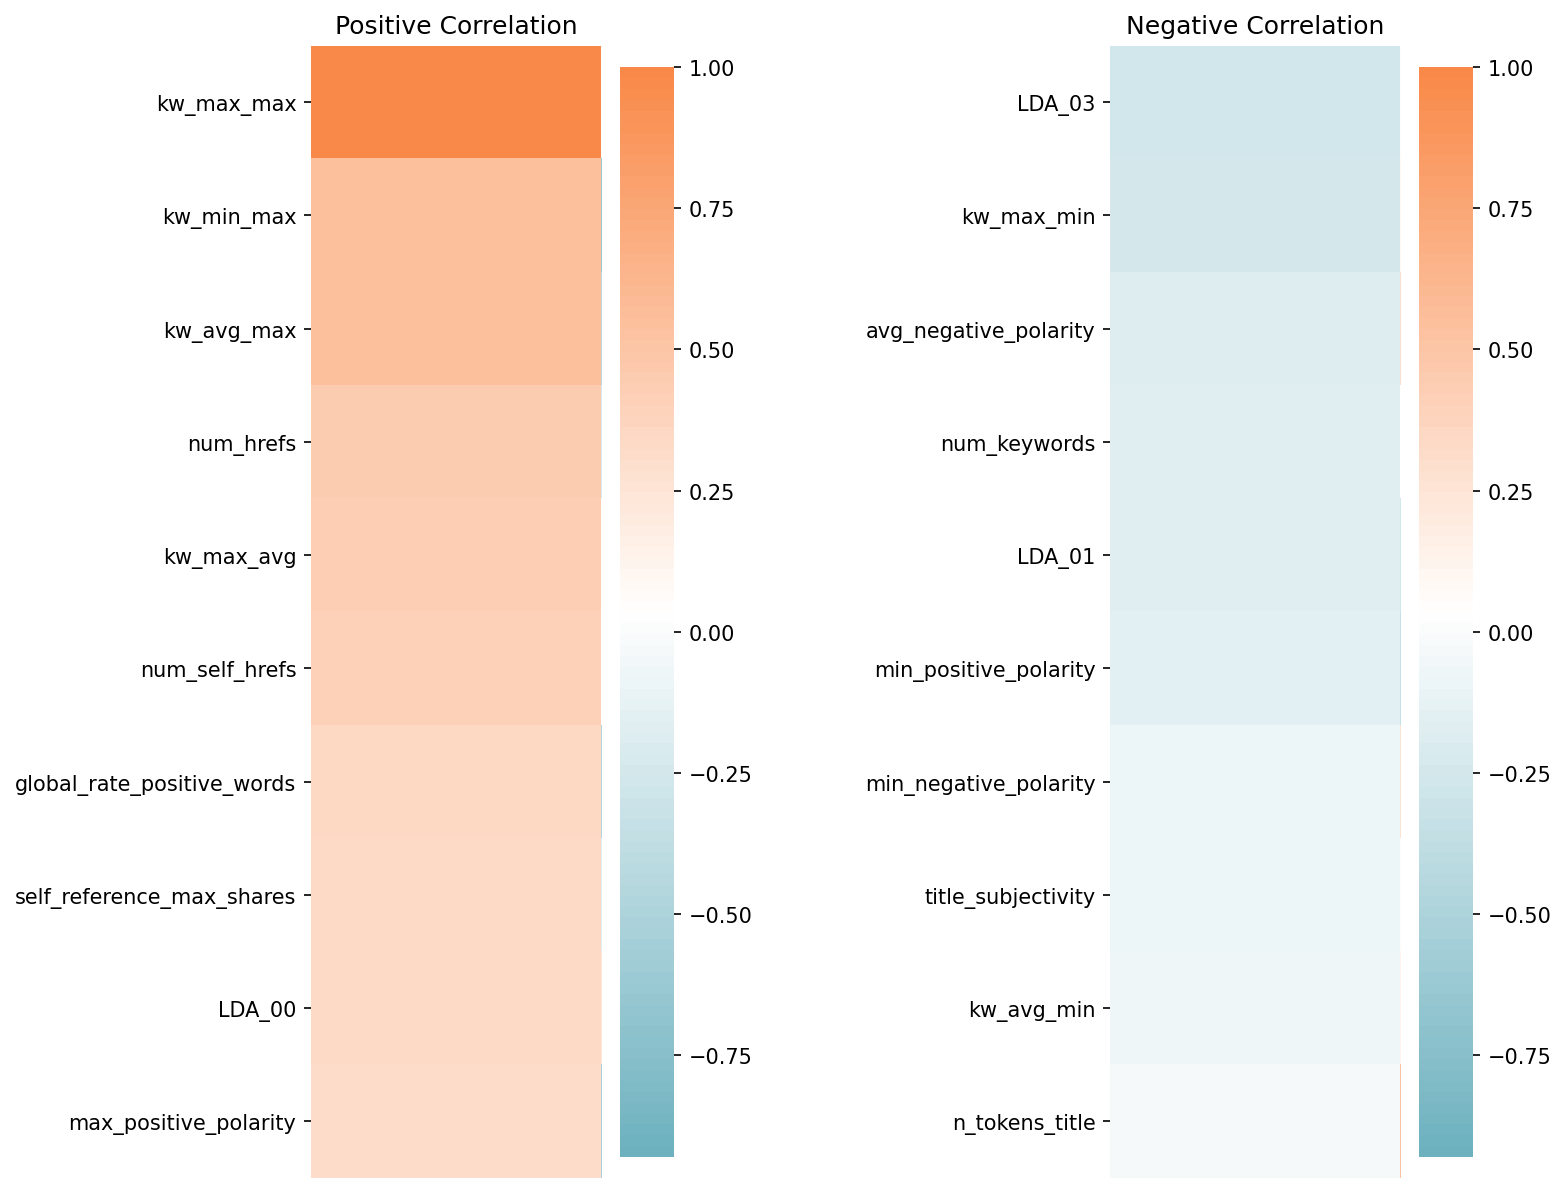

In [17]:
cmap = cplt.LinearSegmentedColormap.from_list("Custom", [c1,'#FFFFFF',c3], N=100)

plt.figure(figsize=(10,10),dpi=150)
plt.subplots_adjust(wspace=1.2)

plt.subplot(121)
sns.heatmap(viral_articles.corr().sort_values('shares',ascending=False),cmap=cmap)
plt.xlim(35,36)
plt.ylim(11,1)
plt.title('Positive Correlation')

plt.subplot(122)
sns.heatmap(viral_articles.corr().sort_values('shares'),cmap=cmap)
plt.xlim(35,36)
plt.ylim(10,0)
plt.title('Negative Correlation')

Seems like the features with the greatest correlation to shares are the kw_max feautres. It also seems subjectivity and positive polarity have a slight negative correlation.

# Save Modeling Data

In [18]:
model_data = pd.get_dummies(data, columns=['channel','weekday'])

# drop the dates, we won't need them for modeling
model_data = model_data.drop(columns=['date','title','kw_max','kw_avg','kw_min'])
model_data.to_csv('Data/Clean - Modeling.csv')

model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39468 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                39468 non-null  float64
 1   n_tokens_content              39468 non-null  float64
 2   n_unique_tokens               39468 non-null  float64
 3   n_non_stop_words              39468 non-null  float64
 4   n_non_stop_unique_tokens      39468 non-null  float64
 5   num_hrefs                     39468 non-null  float64
 6   num_self_hrefs                39468 non-null  float64
 7   num_imgs                      39468 non-null  float64
 8   num_videos                    39468 non-null  float64
 9   average_token_length          39468 non-null  float64
 10  num_keywords                  39468 non-null  float64
 11  self_reference_mi